In [5]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [6]:
df=pd.read_csv("Advertising.csv")

In [7]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [8]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [9]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [10]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [12]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [13]:
df.shape

(200, 5)

In [14]:
df.size

1000

In [15]:
df=df.drop(['Unnamed: 0'],axis=1)

In [16]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [17]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


Text(0.5, 1.0, 'Correlation between Dataset')

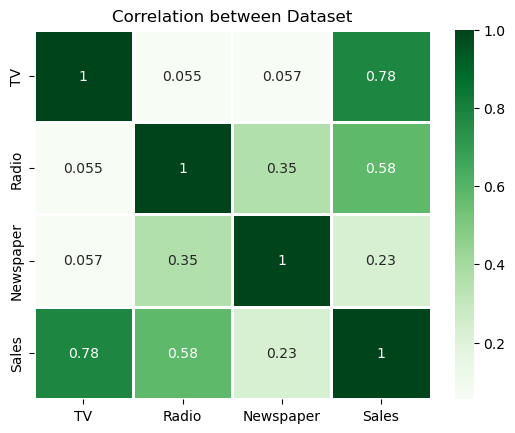

In [18]:
sns.heatmap(df.corr(),cmap="Greens", linecolor='white', linewidths=1, annot=True)
plt.title('Correlation between Dataset')

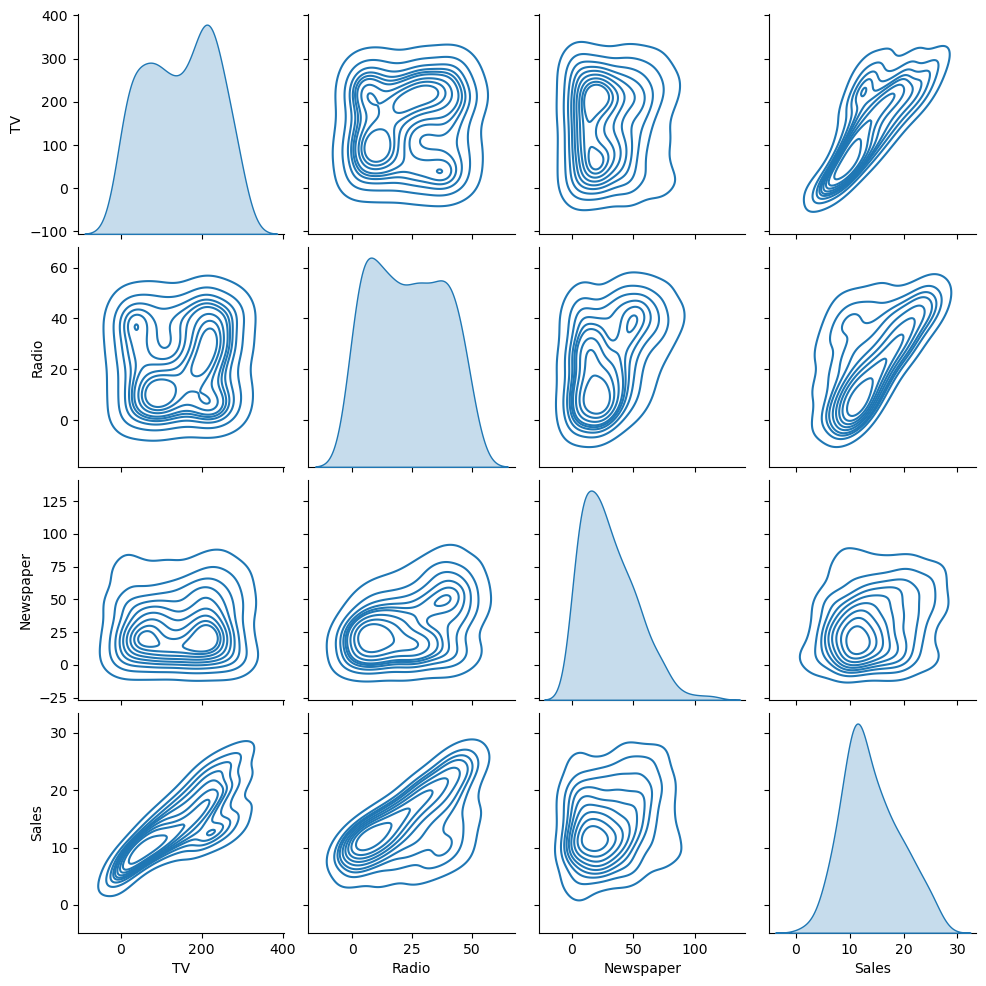

In [19]:
sns.pairplot(df,kind='kde')

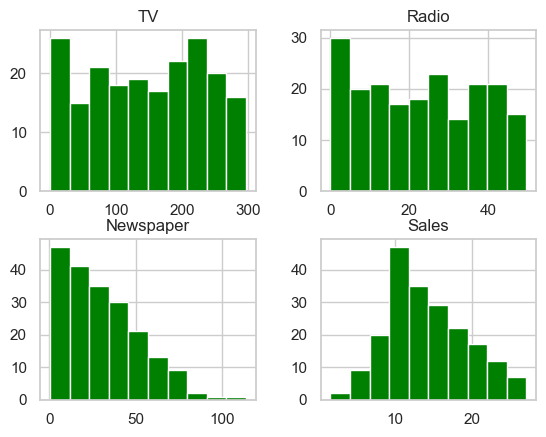

In [20]:
sns.set(style="whitegrid")
df.hist(color="green")
plt.show()

<AxesSubplot:xlabel='Radio', ylabel='Count'>

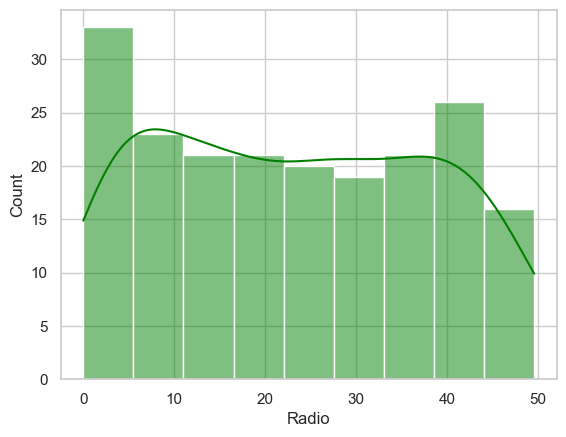

In [22]:
sns.histplot(data=df, x="Radio", kde = True , color="green")

<AxesSubplot:xlabel='Newspaper', ylabel='Count'>

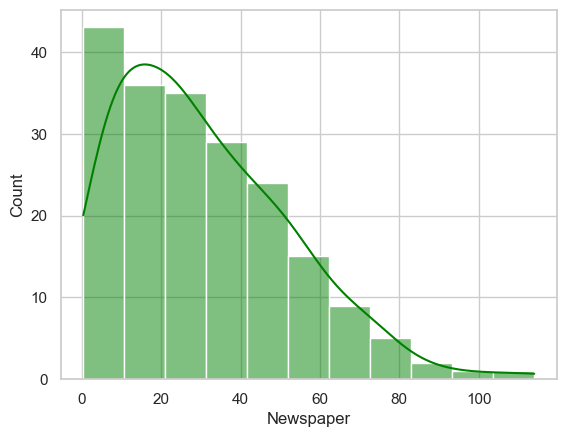

In [23]:
sns.histplot(data=df, x="Newspaper", kde = True , color="green")

<AxesSubplot:xlabel='TV', ylabel='Count'>

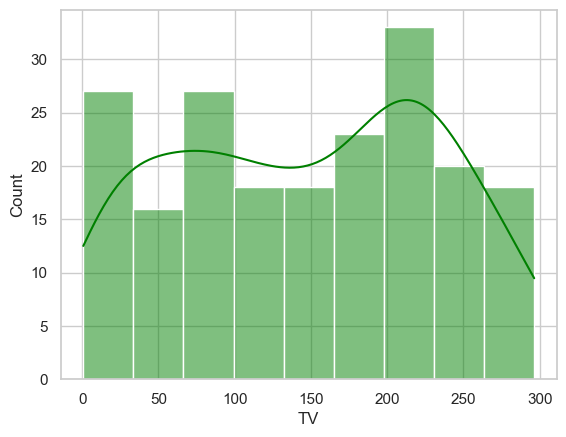

In [24]:
sns.histplot(data=df, x="TV", kde = True , color="green")

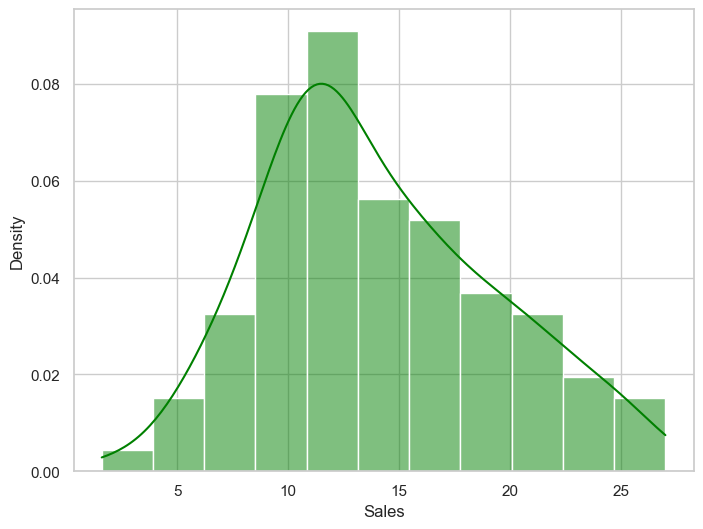

In [25]:
plt.figure(figsize=(8,6))
sns.histplot(df['Sales'], color="green", label="100% Equities", kde=True, stat="density")
plt.show()

In [26]:
x=df[['TV', 'Radio', 'Newspaper']]
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [27]:
y = df[['Sales']]
y

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=1)

In [29]:
print(x.shape, x_train.shape, x_test.shape)

(200, 3) (150, 3) (50, 3)


In [31]:
print(y.shape, y_train.shape, y_test.shape)

(200, 1) (150, 1) (50, 1)


In [32]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [33]:
prediction=model.predict(x_test)

In [34]:
prediction

array([[21.70910292],
       [16.41055243],
       [ 7.60955058],
       [17.80769552],
       [18.6146359 ],
       [23.83573998],
       [16.32488681],
       [13.43225536],
       [ 9.17173403],
       [17.333853  ],
       [14.44479482],
       [ 9.83511973],
       [17.18797614],
       [16.73086831],
       [15.05529391],
       [15.61434433],
       [12.42541574],
       [17.17716376],
       [11.08827566],
       [18.00537501],
       [ 9.28438889],
       [12.98458458],
       [ 8.79950614],
       [10.42382499],
       [11.3846456 ],
       [14.98082512],
       [ 9.78853268],
       [19.39643187],
       [18.18099936],
       [17.12807566],
       [21.54670213],
       [14.69809481],
       [16.24641438],
       [12.32114579],
       [19.92422501],
       [15.32498602],
       [13.88726522],
       [10.03162255],
       [20.93105915],
       [ 7.44936831],
       [ 3.64695761],
       [ 7.22020178],
       [ 5.9962782 ],
       [18.43381853],
       [ 8.39408045],
       [14

In [35]:
R2 = metrics.r2_score(y_test, prediction)

In [36]:
print("R2 Score:{}".format(R2))

R2 Score:0.9156213613792232


In [37]:
mse = mean_squared_error(y_test,prediction)

In [38]:
print("Mean Squared Error: {:.2f}".format(mse))

Mean Squared Error: 1.97
